In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('loan_default.csv')
df.head()

NameError: name 'pd' is not defined

In [1]:
x = df[['Balance', 'Income', 'Loan']]
y = df[['Default']]

NameError: name 'df' is not defined

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
x, 
y, 
test_size=0.2, 
random_state=4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 3) (800, 1)
Test set: (200, 3) (200, 1)


In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

x_train_float = X_train.astype(float)
x_train_norm = preprocessing.StandardScaler().fit(X_train).transform(x_train_float)

In [11]:
k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train_norm,y_train.squeeze())
neigh

KNeighborsClassifier(n_neighbors=4)

In [12]:
x_test_norm = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))
x_test_norm[0:5]
x_test_norm.shape
x_test_norm[:,0].shape

(200,)

In [13]:
yhat = neigh.predict(x_test_norm)

In [20]:
from sklearn import metrics

print("Accuracy score train set: ", 
      metrics.accuracy_score(y_train, neigh.predict(x_train_norm)))
print("Accuracy score test set: ", 
      metrics.accuracy_score(y_test, yhat))

print("Jaccard score train set: ",
      metrics.jaccard_score(y_train, neigh.predict(x_train_norm)))
print("Jaccard score test set: ",
      metrics.jaccard_score(y_test, neigh.predict(x_test_norm)))

print("F1 score train set: ",
      metrics.f1_score(y_train, neigh.predict(x_train_norm)))
print("F1 score test set: ",
      metrics.f1_score(y_test, neigh.predict(x_test_norm)))

Accuracy score train set:  0.97375
Accuracy score test set:  0.95
Jaccard score train set:  0.8917525773195877
Jaccard score test set:  0.7727272727272727
F1 score train set:  0.9427792915531336
F1 score test set:  0.8717948717948718


In [16]:
y_train.shape
yhat.shape

(200,)

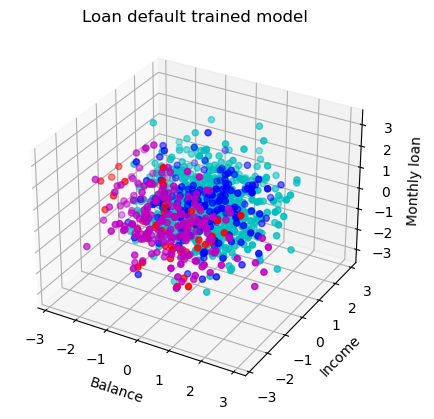

In [19]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
y_train = y_train.squeeze()
test_feat1 = x_test_norm[:,0]
test_feat2 = x_test_norm[:,1]
test_feat3 = x_test_norm[:,2]

train_feat1 = x_train_norm[:,0]
train_feat2 = x_train_norm[:,1]
train_feat3 = x_train_norm[:,2]

ax.scatter(train_feat1[y_train == 1], train_feat2[y_train == 1], train_feat3[y_train == 1], c='m')
ax.scatter(train_feat1[y_train == 0], train_feat2[y_train == 0], train_feat3[y_train == 0], c='c')

ax.scatter(test_feat1[yhat == 1], test_feat2[yhat == 1], test_feat3[yhat == 1], c='r')
ax.scatter(test_feat1[yhat == 0], test_feat2[yhat == 0], test_feat3[yhat == 0], c='b')

ax.set_xlabel('Balance')
ax.set_ylabel('Income')
ax.set_zlabel('Monthly loan')
ax.set_title("Loan default trained model")

#plt.scatter(balance, income, monthly_loan)
plt.show()